In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table('data/facemasks.tsv').drop_duplicates()
df.set_index('id', verify_integrity=True, inplace=True)
df.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,...,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle,product_name,material,n_masks,brand,product_price
id,,,,,,,,,,,,,,,,,,,,,
05c2b17e-c28d-4792-930d-27e787d8d4ad,0,iHerb Customer,0,6,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,34.0,...,True,1.614071e+09,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,iHerb Customer,0,0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,37.0,...,False,1.612659e+09,ru-RU,The grandson really liked it. Comfortable mask.,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
9a76e047-21e4-4da3-8b50-9d2396519b6b,0,iHerb Customer,0,0,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,3.0,...,False,1.612648e+09,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
2890ac54-8707-418e-be3e-8d46231e3672,0,InnaIgorevna,0,0,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,16.0,...,False,1.612543e+09,ru-RU,A thin mask that is pleasant to the body. I li...,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,iHerb Customer,0,0,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,19.0,...,False,1.612518e+09,ru-RU,Great mask! It suited me perfectly. There is a...,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85


### What are the most popular face masks in the store and what are their key features (e.g. price, material, design)?

In [3]:
by_rating = df.groupby('productId')['ratingValue'].mean()
by_sales = df.groupby('productId')['product_price'].sum()
meta = df[['productId', 'material', 'brand', 'n_masks']].drop_duplicates().set_index('productId', verify_integrity=True)
x = pd.DataFrame([by_sales, by_rating, df['productId'].value_counts()]).T
x = pd.concat([x, meta], axis=1)

df['postedDate'] = pd.to_datetime(df['postedDate'])
s = df.groupby('productId')['postedDate']
x['age'] = (s.max() - s.min()).dt.days
x.sort_values(['ratingValue'], ascending=False)

,product_price,ratingValue,productId,material,brand,n_masks,age
103839,82.20,48.333333,12.0,copper,Lozperi,1,17
103204,1053.99,47.619048,21.0,other,Hwipure,25,52
103842,54.80,47.500000,8.0,copper,Lozperi,1,19
103840,137.00,47.000000,20.0,copper,Lozperi,1,21
102734,5172.95,46.498516,337.0,other,Zidian,50,90
103838,287.70,45.952381,42.0,copper,Lozperi,1,21
103743,304.06,45.869565,46.0,other,Puritas,3,31
101774,495.60,45.833333,168.0,other,HIGUARD,1,134
100840,267.24,45.588235,68.0,other,YJ Corporation,1,179
103205,185.85,45.555556,63.0,other,Hwipure,1,47


In [5]:
x.to_csv('data/product-details.csv')

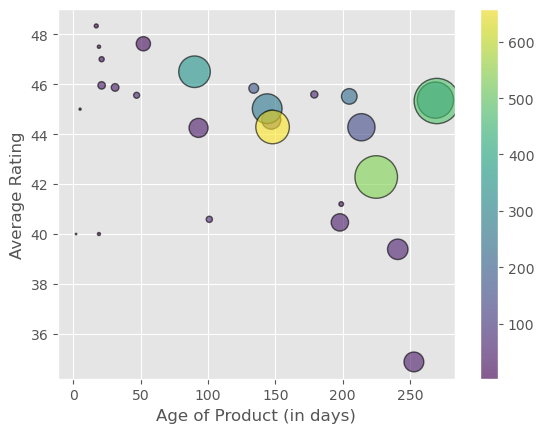

In [108]:
fig, ax = plt.subplots()
k = ax.scatter(x['age'], x['ratingValue'], s=x['product_price'] / 10, c=x['productId'], alpha=0.6, ec='k', linewidths=1)
ax.set_xlabel('Age of Product (in days)')
ax.set_ylabel('Average Rating')

for ix, rowdata in 

cbar = plt.colorbar(k)

In [109]:
eng = df[df['languageCode'].str.startswith('en')]

In [114]:
from wordcloud import WordCloud

In [119]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

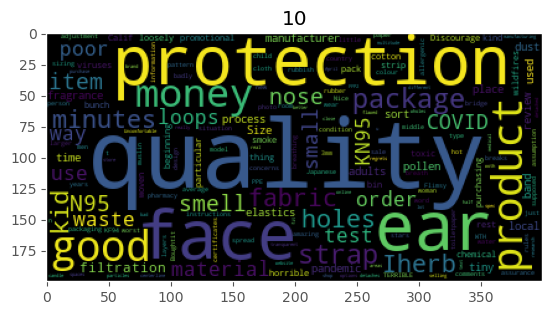

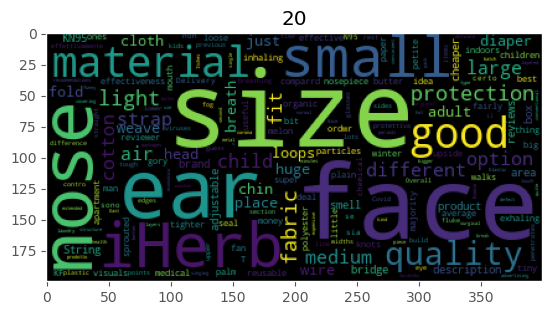

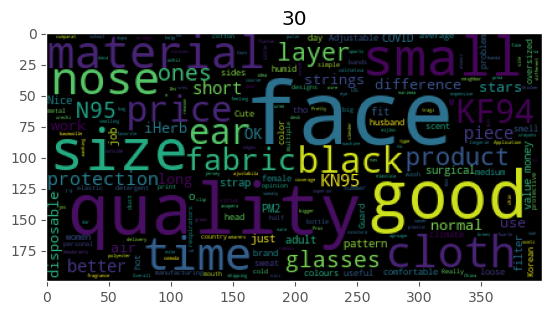

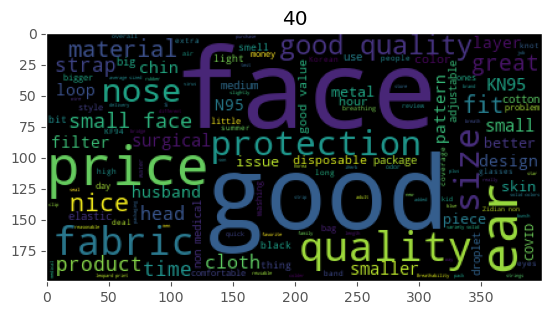

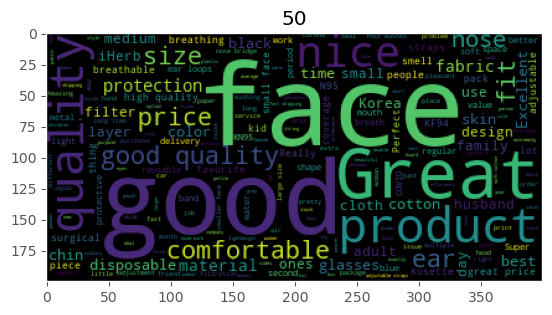

In [141]:
stop = ENGLISH_STOP_WORDS.union({'mask', 'masks'})

for ratingval, group in eng.groupby('ratingValue'):
    phrases = [' '.join([k.text for k in d.noun_chunks]) for d in nlp.pipe(group['reviewText'])]
    # reviews = ' '.join(group['reviewText'])
    wc = WordCloud(stopwords=stop).generate(' '.join(phrases))
    plt.figure()
    plt.title(str(ratingval))
    plt.imshow(wc)
    plt.grid(False)

In [128]:
eng[eng['ratingValue'] == 10]['reviewText'].sample(10).tolist()

['Yes, there is no way this is N95.\nIt looks like really good quality materials that were ruined by a flawed manufacturing process. That branding etc text almost punched through it and created thin transparent areas/holes in the masks.\nMine were manufactured in April.',
 'Can’t figure out how to use it... and it looks not a good enough quality ',
 "purchase regrets doesn't fit well",
 '.',
 'They are soft on the face, however it didn’t pass the candle test',
 'Ear band ripped in first use\n',
 'Size is very small and they have thick layers...do not use',
 'I used to buy here  amazing KF94 masks that got discontinued. So I decided to try this one but sadly was left disappointed. This mask is absolutely not breathable and after few minutes of wear I felt like my face was boiling! Never again.',
 "Boughtit as they were cheap, and thought iHerb doesn't sell masks without quality certificates and that passed tests.\nSearched myself for manufacturer and the mask test. Protection is maximum

In [130]:
from spacy import load

2023-04-18 17:00:37.524904: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 17:00:38.566338: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-18 17:00:38.566405: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-18 17:00:38.566411: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [131]:
nlp = load('en_core_web_sm')

In [137]:
eng[eng['ratingValue'] == 10]['reviewText'].head(10).tolist()

['I think it’s a kids mask. Didn’t realize ',
 'Can’t figure out how to use it... and it looks not a good enough quality ',
 "The mask is made from loosely woven cotton, so it is useless as protection against viruses. It's the sort of a thing that's usually given away for free as a promotional item, but even if I got it for free, it would go straight to the bin.",
 'the straps break as soon as you lightly touch it. every time.',
 "The nose strip that holds it snug to the nose came unglued after the first 5 minutes - so the mask was rendered useless because it couldn't seal.  Every mask in the bunch performed this way.  Discourage purchasing.",
 'These masks have a horrible chemical smell. I wore one mask for two minutes and then donated the rest of the pack.  Full disclosure, I am very sensitive to fragrances of any kind... but the N95s I had at the beginning of the pandemic had no such smell, so I can only assume it is something about this particular manufacturer.  ',
 'This product i

In [138]:
for doc in nlp.pipe(eng[eng['ratingValue'] == 50]['reviewText']):
    print(list(doc.noun_chunks))

[The mask quality, the color, It, my face fine]
[a small face, me, it, better kid size, it, such an extremely pleasant material, I]
[The Copper fibers, the fabric, sterilization, germs, protection, radiation]
[]
[I, the color]
[I, these]
[the skin]
[I, disposable ones, they, my face, I, these masks, my skin, them, I, myself, them, I]
[Nice soft fabric, a cold winter]
[They, what, me, muslin swaddle blankets, a bunch, layers, them, Extremely stretchy ear loops, dog fur veryy, I, them, I, my mask, my face, those suckers, you, pets, I, they]
[I, them, everyday basis]
[it, The only mask, I]
[Perfect]
[All the face  masks, Light]
[]
[]
[They, you, it, I, these, my 10 hour shifts, They, my petite face, I, the string, my ears, around 4 hours, I, many masks, that, that, The colours, person, they, I, them]
[Very nice touch, a babies]
[This, my second purchase, these but different colors, I, the muslin-like material, they, my face]
[]
[That]
[great mask]
[Worth buying, It, the skin, THE PRINTS, 

In [142]:
import scattertext as st

In [143]:
df['verdict'] = ['Good' if k >= 30 else 'Bad' for k in df['ratingValue']]

In [144]:
eng = df[df['languageCode'].str.startswith('en')]
eng.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,...,score,languageCode.1,translation.reviewText,translation.reviewTitle,product_name,material,n_masks,brand,product_price,verdict
id,,,,,,,,,,,,,,,,,,,,,
05c2b17e-c28d-4792-930d-27e787d8d4ad,0,iHerb Customer,0,6,1,en-US,2021-01-27 09:04:10.569000+00:00,103839,0.0,34.0,...,1.614071e+09,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,Good
9a76e047-21e4-4da3-8b50-9d2396519b6b,0,iHerb Customer,0,0,0,en-US,2021-02-06 21:40:02.886000+00:00,103839,0.0,3.0,...,1.612648e+09,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,Good
5fab014c-d839-4743-a343-cf03b7b168ce,0,iHerb Customer,0,0,0,en-US,2021-02-02 12:28:22.584000+00:00,103839,7.0,258.0,...,1.612269e+09,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,Good
90e02dad-fcf3-4c40-b21c-6e7b12168ee6,0,iHerb Customer,0,0,0,en-US,2021-02-01 20:59:59.034000+00:00,103839,1.0,62.0,...,1.612213e+09,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,Good
72c1f16a-9c93-4b8a-961d-8ee4487c5c72,0,iHerb Customer,0,0,0,en-US,2021-01-27 08:43:35.293000+00:00,103839,0.0,133.0,...,1.611737e+09,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,Good


In [152]:
eng['parsed'] = eng.reviewText.apply(st.whitespace_nlp_with_sentences)

/tmp/ipykernel_108104/3049314260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng['parsed'] = eng.reviewText.apply(st.whitespace_nlp_with_sentences)


In [153]:
corp = st.CorpusFromParsedDocuments(eng, 'verdict', 'parsed')

In [157]:
corp.build()

In [159]:
corp

In [160]:
corpus = corp.build()

In [161]:
corpus

In [162]:
corpus.get_scaled_f_scores_vs_background().index[:10]

Index(['covid', 'iherb', 'kosette', 'masks', 'breathable', 'zidian',
       'comfotrable', 'mask', 'fogging', 'higuard'],
      dtype='object')

In [164]:
tf = corpus.get_term_freq_df()
tf['good_score'] = corpus.get_scaled_f_scores('Good')

In [165]:
tf.sort_values('good_score', ascending=False)

,Good freq,Bad freq,good_score
term,,,
love,244,0,1.000000
price,206,0,0.999998
very comfortable,172,0,0.999944
great,486,4,0.995322
very good,114,0,0.994666
...,...,...,...
unfortunately,6,10,0.031028
couldn,2,10,0.022341
minutes,2,10,0.022341


In [166]:
tf['bad_score'] = corpus.get_scaled_f_scores('Bad')
tf.sort_values('bad_score', ascending=False)

,Good freq,Bad freq,good_score,bad_score
term,,,,
disappointed,6,16,0.000000,1.000000
couldn t,2,10,0.022341,0.977659
couldn,2,10,0.022341,0.977659
minutes,2,10,0.022341,0.977659
provide,6,10,0.031028,0.968972
...,...,...,...,...
very good,114,0,0.994666,0.005334
great,486,4,0.995322,0.004678
very comfortable,172,0,0.999944,0.000056


In [170]:
html = st.produce_scattertext_explorer(corpus,
                                           category='Good',
          category_name='Good',
          not_category_name='Bad',
          width_in_pixels=1000)
with open("Convention-Visualization.html", 'wb') as fout: fout.write(html.encode('utf-8'))